### Задача:
<i>Как пешеходный радиус вокруг даркстора связан с матожиданием времени курьера в пути? Распределение клиентов по площади круга равномерное. Радиус круга = R.</i>

Будем считать, курьер движится по прямой из дакстора (центра окружности) к клиенту по прямой (к случайной точке внутри коружности) с константной скоростью.

#### Решим задачу методом Монте-Карло.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Научимся создавать случайные точки внутри окружности и считать растояние до центра.

In [2]:
# radius of the circle
circle_r = 10
# center of the circle (x, y)
circle_x = 10
circle_y = 10


def get_random_point_distance(circle_r, circle_x, circle_y):
    
    o = np.array([circle_x, circle_y])
    # random angle
    alpha = 2 * np.pi * np.random.random()
    # random radius
    r = circle_r * np.sqrt(np.random.random())
    # calculating coordinates
    x = r * np.cos(alpha) + circle_x
    y = r * np.sin(alpha) + circle_y
    p = np.array([x, y])
    
    return p, np.linalg.norm(o-p)


get_random_point_distance(circle_r, circle_x, circle_y)

(array([7.60808249, 6.77380327]), 4.016169158145798)

Проверим как создаются точки.

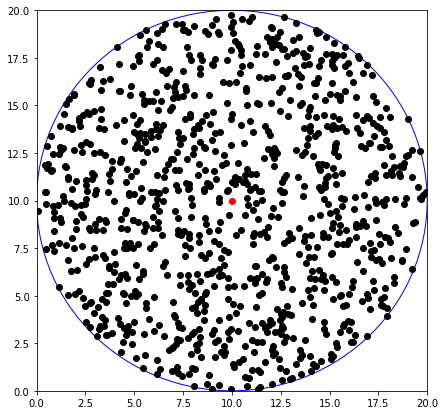

In [3]:
n = 1000
result = []

plt.figure(figsize=(7,7))
ax = plt.gca()

for _ in range(n):
    p = get_random_point_distance(circle_r, circle_x, circle_y)[0]
    ax.plot(p[0], p[1], 'o', color='black')

ax.plot(circle_x, circle_y, 'o', color='red')

circle = plt.Circle((circle_x, circle_y), circle_r, color='b', fill=False)

ax.set_xlim((0, circle_x + circle_r))
ax.set_ylim((0, circle_y + circle_r))
ax.add_patch(circle);

Все получилось, давайте смотреть как меняется среднее расстояние от центра до случайной точки при увеличении радиуса. Сгенерируем большое количество точек и сохраним дистанцию от ни до центра окружности.

<AxesSubplot:>

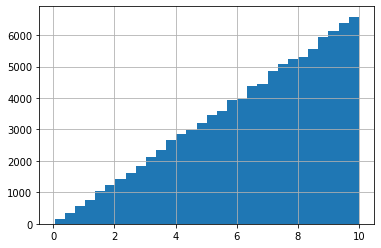

In [4]:
n = 100000
result = []

for _ in range(n):
    result.append(get_random_point_distance(circle_r, circle_x, circle_y)[1])
    
distance_s = pd.Series(result)
distance_s.hist(bins=30)

Гистограмма показывает что, распределение точек по площади равномерное. 

In [5]:
for i in range(1,11):
    distance = distance_s[distance_s <= i]
    print(f'R = {i}, {distance.mean() = }, normalized = {distance.mean() / i}')

R = 1, distance.mean() = 0.6599232208884881, normalized = 0.6599232208884881
R = 2, distance.mean() = 1.3396210424478627, normalized = 0.6698105212239314
R = 3, distance.mean() = 1.991654676902866, normalized = 0.6638848923009554
R = 4, distance.mean() = 2.677279805615104, normalized = 0.669319951403776
R = 5, distance.mean() = 3.3424783571073213, normalized = 0.6684956714214643
R = 6, distance.mean() = 4.008852396446335, normalized = 0.6681420660743892
R = 7, distance.mean() = 4.666855310074467, normalized = 0.6666936157249239
R = 8, distance.mean() = 5.342613061206273, normalized = 0.6678266326507841
R = 9, distance.mean() = 6.004062945983269, normalized = 0.6671181051092521
R = 10, distance.mean() = 6.676706056045996, normalized = 0.6676706056045996


# Вывод

Расчет показал, что при увеличении радиуса доставки на Х, среднее время доставки увеличится на время, необходимое для преодаления курьером расстояния 0.66*Х 

Пример:

Курьер движется со скоростью 5 км/ч.
Хотим увеличить радиус доставки на 1 км.

1 км курьер проходит за 60 / 5 = 12 минут.

Среднее время доставки увеличится на 12 * 0.66 = 8 минут.